In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [78]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [79]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [80]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [81]:
len(dataset)

68

(32, 256, 256, 3)
[0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 2 0 2 1 1 1 0 1 0]


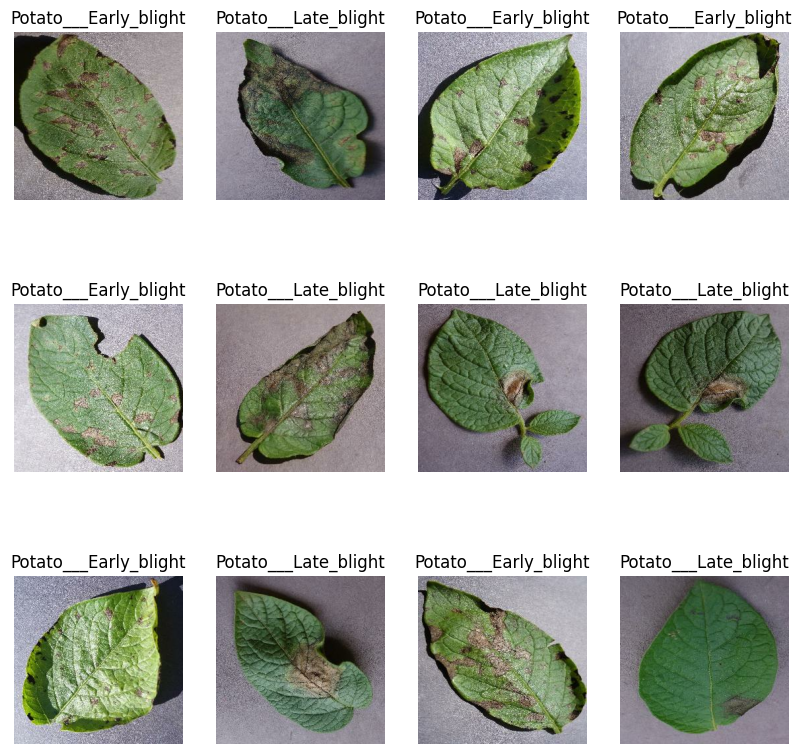

In [82]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels_batch[i]])

In [83]:
80% ==> Training
20% ==> Test
    10% ==> Validation
    10% ==> Test

SyntaxError: invalid syntax (3118021881.py, line 1)

In [ ]:
train_size = 0.8
len(dataset)*train_size

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

In [84]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [85]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [86]:
Val_ds = test_ds.take(6)
len(Val_ds)

6

In [87]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [88]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [89]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [90]:
len(train_ds)

54

In [91]:
len(val_ds)

6

In [92]:
len(test_ds)

8

In [93]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [94]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.45882353 0.42745098 0.47843137]
  [0.45882353 0.42745098 0.47843137]
  [0.4627451  0.43137255 0.48235294]
  ...
  [0.4392157  0.4        0.43529412]
  [0.42352942 0.38431373 0.41960785]
  [0.40392157 0.3647059  0.4       ]]

 [[0.45490196 0.42352942 0.4745098 ]
  [0.4509804  0.41960785 0.47058824]
  [0.45882353 0.42745098 0.47843137]
  ...
  [0.43529412 0.39607844 0.43137255]
  [0.4117647  0.37254903 0.40784314]
  [0.3882353  0.34901962 0.38431373]]

 [[0.4509804  0.41960785 0.47058824]
  [0.44705883 0.41568628 0.46666667]
  [0.4509804  0.41960785 0.47058824]
  ...
  [0.42745098 0.3882353  0.42352942]
  [0.40392157 0.3647059  0.4       ]
  [0.38039216 0.34117648 0.3764706 ]]

 ...

 [[0.654902   0.6431373  0.6862745 ]
  [0.6509804  0.6392157  0.68235296]
  [0.654902   0.6431373  0.6862745 ]
  ...
  [0.5568628  0.53333336 0.5803922 ]
  [0.56078434 0.5372549  0.58431375]
  [0.56078434 0.5372549  0.58431375]]

 [[0.6392157  0.627451   0.67058825]
  [0.6313726  0.61960787 0.6627451 ]


In [95]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [97]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [98]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [99]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [101]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 907ms/step - accuracy: 0.4273 - loss: 0.9457 - val_accuracy: 0.5000 - val_loss: 0.8871
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 806ms/step - accuracy: 0.5783 - loss: 0.8517 - val_accuracy: 0.7812 - val_loss: 0.8016
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 779ms/step - accuracy: 0.8015 - loss: 0.5581 - val_accuracy: 0.8906 - val_loss: 0.3530
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.8878 - loss: 0.3188 - val_accuracy: 0.8802 - val_loss: 0.2671
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 898ms/step - accuracy: 0.8919 - loss: 0.2934 - val_accuracy: 0.8958 - val_loss: 0.2337
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 861ms/step - accuracy: 0.9257 - loss: 0.2050 - val_accuracy: 0.9271 - val_loss: 0.1619
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 839ms/step - accuracy: 0.9492 - loss: 0.1267 - val_accuracy: 0.9323 - val_loss: 0.1300
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 816ms/step - accuracy: 0.9538 - loss: 0.1135 - val_accu

54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 854ms/step - accuracy: 1.0000 - loss: 2.7656e-05 - val_accuracy: 1.0000 - val_loss: 3.9198e-05


In [105]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9986 - loss: 0.0110


In [106]:
scores

[0.021025722846388817, 0.99609375]

In [107]:
history

In [108]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [109]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [110]:
type(history.history['loss'])

list

In [111]:
len(history.history['loss'])

50

In [112]:
history.history['loss'][:5]

[0.9130256772041321,
 0.8324967622756958,
 0.4989004135131836,
 0.28177767992019653,
 0.2973460555076599]

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

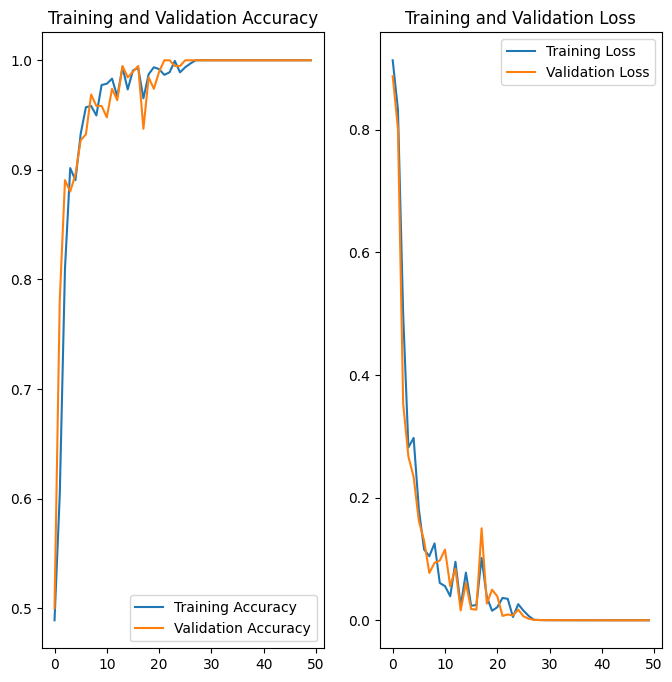

In [114]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
predicted label: Potato___Early_blight


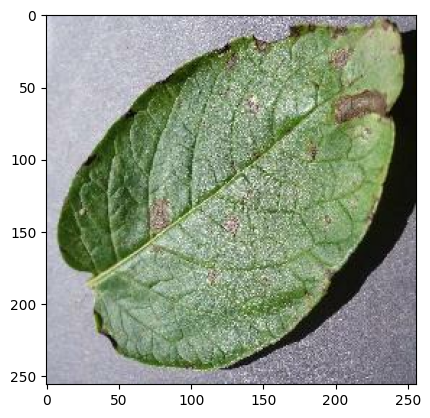

In [115]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [116]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


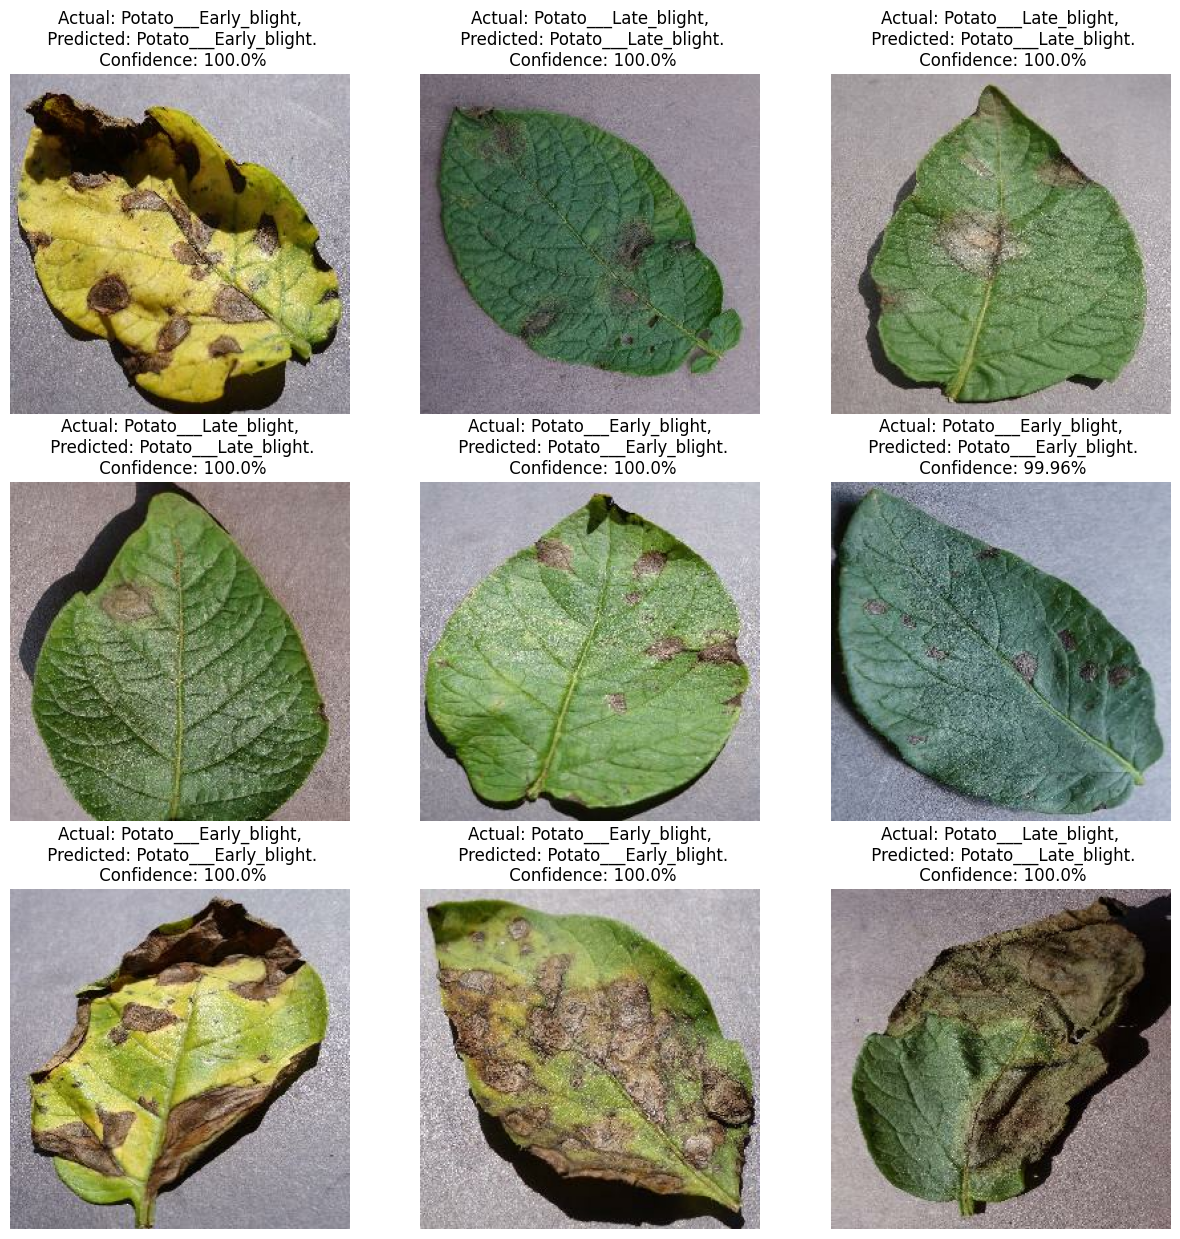

In [121]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model_version = 1
model.save(f"models/{model_version}")

In [ ]:
import os 
model_version=max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"models/{model_version}")